In [1]:
import mne, os
from signal_processing.pre_process import *
from basic.arrange_data import read_files

**Set the folder of EEG files**

Run the cell to be prompted with an input box for choosing the folder containing the EEG files of interest.

*NB! The path has to be in 'Data\Raw\' folder relative to this notebook.*

In [2]:
exp_folder = r"Eyes Closed\test" # in case you want to just type the dir here
#exp_folder = input('Experiment folder (e.g., Eyes Open\Baseline):')

raw_folder = r"Data\Raw"
clean_folder = r"Data\Clean"
dir_inprogress = os.path.join(raw_folder,exp_folder)
export_dir = os.path.join(clean_folder,exp_folder)

file_dirs, subject_names = read_files(dir_inprogress,".bdf")

Files in folder: 2


**Pre-process raw EEG files and save them**

1. Read raw BDF file, set EOG channels, and montage type
2. Filter data with FIR bandpass filter and remove EOG noise
3. Segment data into epochs and conduct artefact rejection and augmentation
4. Attempt to create a folder and save the cleaned signal file in FIF format (only successful if the path is empty!)

Extracting EDF parameters from c:\Users\TANIJARV\Downloads\Ketamine-SI project\eeg-pipeline\Data\Raw\Eyes Closed\test\OKTOS_0001_00A_EC.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 268287  =      0.000 ...   261.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6759 samples (6.601 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
-

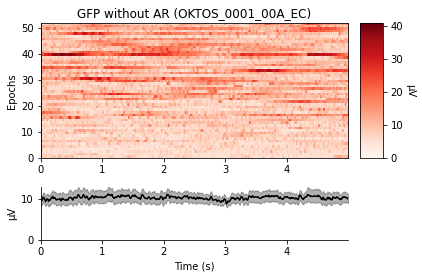

Estimating rejection dictionary for eeg
Dropping epochs with rejection threshold: {'eeg': 0.000288342232474596}
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/52 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/52 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/52 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/52 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=31


  0%|          | Repairing epochs : 0/52 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


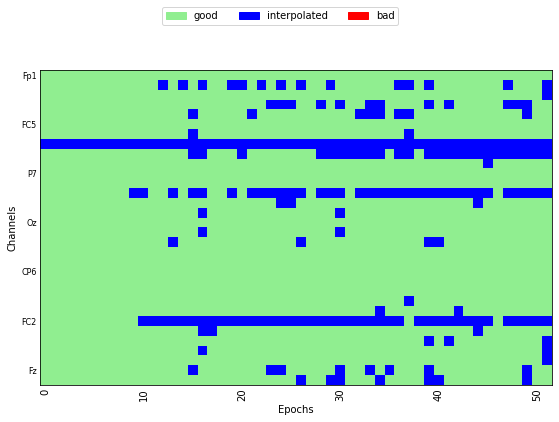

Not setting metadata
52 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


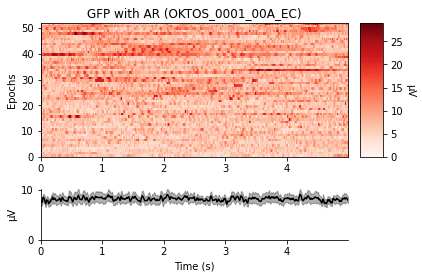

Extracting EDF parameters from c:\Users\TANIJARV\Downloads\Ketamine-SI project\eeg-pipeline\Data\Raw\Eyes Closed\test\OKTOS_0002_00A_EC.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 275455  =      0.000 ...   268.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6759 samples (6.601 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
-

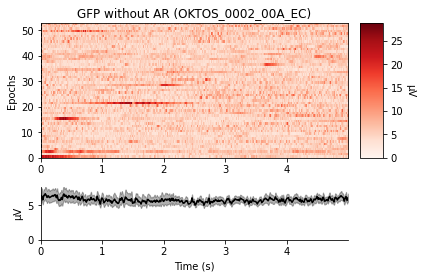

Estimating rejection dictionary for eeg
Dropping epochs with rejection threshold: {'eeg': 0.00010842911282166675}
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['FC5']
4 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/49 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/49 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/49 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/49 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/49 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


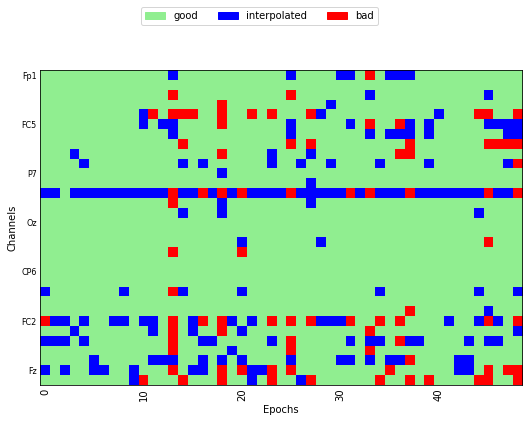

Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


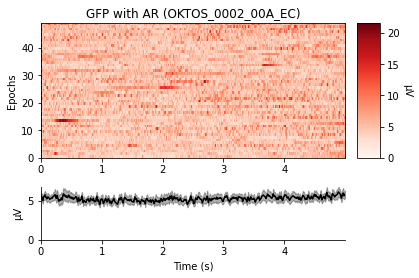

In [3]:
for i in range(len(file_dirs)):  
    raw = mne.io.read_raw_bdf(file_dirs[i],
                        eog=["EXG1","EXG2","EXG3","EXG4","EXG5","EXG6","EXG7","EXG8"],
                        stim_channel="Status").set_montage(mne.channels.make_standard_montage("biosemi32"))
    
    filt = filter_raw_data(raw,l_freq=0.5,h_freq=30,eog_remove=True)
    %matplotlib inline
    epochs = artefact_rejection(filt,subject_names[i],epo_duration=5)

    # For displaying interactive EEG plots
    #%matplotlib qt
    #epochs.plot(n_channels=32)

    try:
        os.makedirs(export_dir)
    except FileExistsError:
        pass
    try:
        mne.Epochs.save(epochs,fname='{}\{}_clean-epo.fif'.format(export_dir,subject_names[i]))
    except FileExistsError:
        pass